In [29]:
from google.colab import files

In [30]:
import pandas as pd

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_excel ("/content/drive/MyDrive/MLAssignment/Insurance_Updated.xlsx")

**Summarize Data**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_days             1000 non-null   int64  
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [34]:
# List of features to drop
features_to_drop = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
    'auto_make',
    'auto_model',
    '_c39'
]

# Drop the specified features from the dataframe
df.drop(columns=features_to_drop, inplace=True)

# Now df contains the dataset with the specified features dropped

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_days             1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_days                1000 non-null   int64  
 11  incident_hour_of_the_day     1000 non-null   int64  
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  bodily_injuries    

In [36]:
# Encoding fraud_reported(dependent variable column)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.fraud_reported)
df['fraud_reported'] = le.transform(df.fraud_reported)

In [37]:
# df.info()

In [38]:
# List of features to drop based as they have less feature importance
features_to_drop = ['umbrella_limit', 'number_of_vehicles_involved', 'policy_deductable']

# Drop specified features from the DataFrame
df.drop(columns=features_to_drop, inplace=True)

In [39]:
# df.info()

In [40]:
#df = df[(z_scores <= threshold).all(axis=1)]
#remove outliers

In [41]:
#df after removing outliers
# df.info()

**SVM Prac**

In [42]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.fraud_reported == 0]
df_minority = df[df.fraud_reported == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # for reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.fraud_reported.value_counts()
df = df_upsampled


In [43]:
# import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import svm
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from sklearn.preprocessing import RobustScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [44]:
# from google.colab import drive
# drive.mount('/content/drive')

In [45]:
# df = pd.read_excel("/content/drive/MyDrive/MLAssignment/Insurance_Updated.xlsx")

**Get the data from Google Drive**

In [46]:
# print(df.info(),'\n')
# print(df.head(),'\n')
# print(df.describe(),'\n')

**Split the data into training and testing sets**

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud_reported', axis=1), df['fraud_reported'], test_size=0.2, random_state=50)

In [48]:
X_train

,months_as_customer,age,policy_number,policy_bind_days,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_days,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
163,112,30,346940,7879,1166.54,479852,47700,-59300,3366,3,2,0,107900,10790,21580,75530,1997
638,34,34,409074,11709,1295.87,438529,0,0,3374,4,1,0,50800,5080,5080,40640,1997
281,186,33,779075,5155,1348.32,469429,37600,-37600,3373,3,2,1,4730,860,860,3010,2013
722,269,41,334749,10116,1422.21,620507,0,-46400,3371,21,2,1,85900,17180,17180,51540,2005
721,130,34,153298,5496,990.11,442666,0,-41200,3377,8,1,3,5830,1060,1060,3710,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,239,42,246882,8968,969.50,464839,0,0,3361,10,0,0,5600,700,700,4200,2007
184,296,46,922167,11368,1141.35,476456,0,0,3381,18,0,2,54900,5490,5490,43920,2013
552,360,51,550294,8170,1526.61,471866,0,-32900,3357,5,2,2,4620,840,840,2940,2009
157,428,59,299796,8959,1344.36,473329,0,0,3350,8,2,3,6500,1300,650,4550,2013


**Robust scaling**

In [49]:
#scale features so it is good as preprocessing step
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_test_scaled

array([[ 1.50369276,  1.69230769,  0.94797083, ..., -0.1109215 ,
         0.04085106, -0.2       ],
       [-0.85967504, -1.23076923, -0.01434713, ...,  0.38395904,
        -0.36652482,  0.2       ],
       [ 1.14918759,  1.46153846, -0.02663509, ...,  1.42832765,
         1.8893617 , -0.3       ],
       ...,
       [ 0.36927622,  0.38461538,  0.12111988, ..., -0.61945392,
        -0.95659574,  0.7       ],
       [-0.3042836 , -0.46153846,  0.23967508, ...,  0.10238908,
         1.38950355, -0.3       ],
       [ 1.23781388,  1.23076923, -0.98411118, ...,  1.61262799,
         1.73163121,  0.6       ]])

**Create an SVM classifier**

In [51]:
classifier = svm.SVC()

**Define the hyperparameter grid to search**

In [52]:

#hyperparameters = {'kernel': ['linear']}

hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'gamma': [0.01, 0.1, 1, 10, 100]}


**Search the hyperparameter grid using GridSearchCV()**

In [53]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

**Use the best model provided by the grid search to make predictions on the test data**

In [54]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

SVC(C=1, gamma=10) 



In [55]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}


**Print the confusion matrix and performance metrics (classification report)**

In [56]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148   0]
 [ 18 136]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       148
           1       1.00      0.88      0.94       154

    accuracy                           0.94       302
   macro avg       0.95      0.94      0.94       302
weighted avg       0.95      0.94      0.94       302



**Display the confusion matrix (heatmap)**

<Axes: >

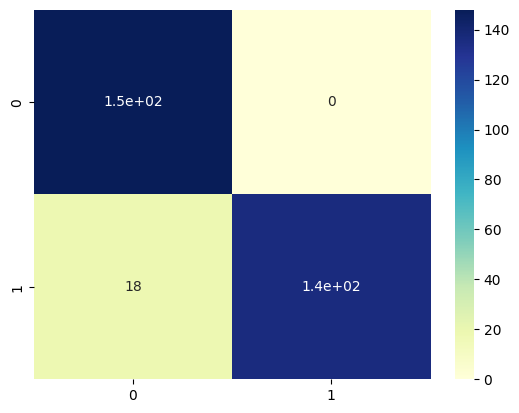

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")